In [ ]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

In [ ]:
# import dataset
data = pd.read_csv("/content/Salary_Data.csv")
data

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


# EDA and Data visualization

In [ ]:
data.shape

(30, 2)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [ ]:
data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


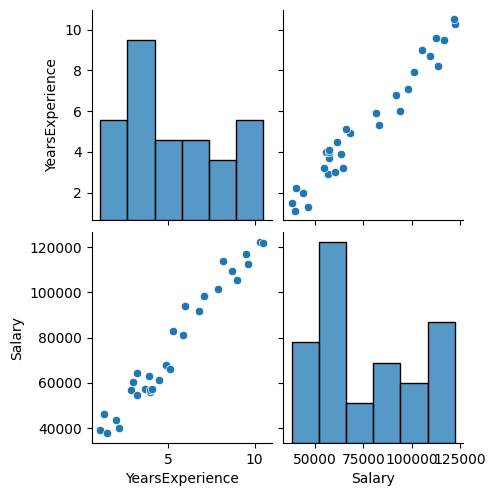

In [ ]:
sns.pairplot(data)

<ipython-input-7-10b07b01fa97>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Salary'])


<Axes: xlabel='Salary', ylabel='Density'>

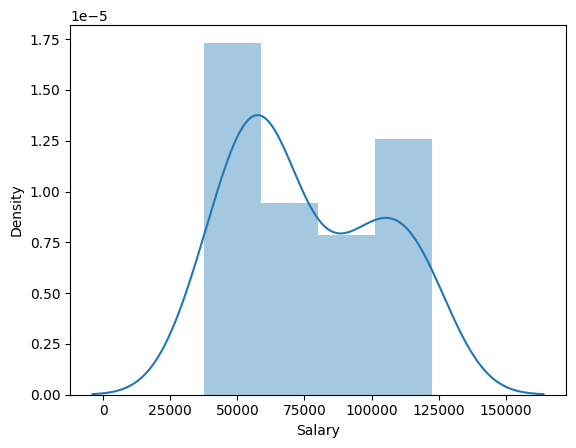

In [ ]:
sns.distplot(data['Salary'])

<ipython-input-8-f0f3c37637f8>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['YearsExperience'])


<Axes: xlabel='YearsExperience', ylabel='Density'>

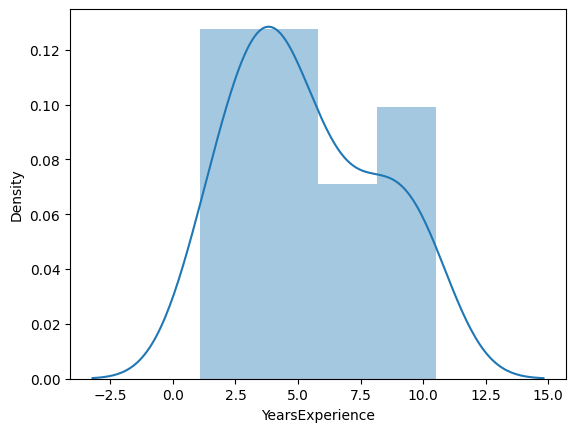

In [ ]:
sns.distplot(data['YearsExperience'])

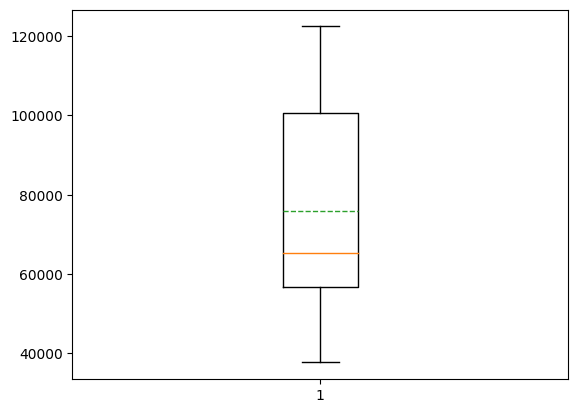

In [ ]:
plt.boxplot(data['Salary'],meanline=True,showmeans=True)
plt.show()

# There is no outlier in the data. But the right skewness is present in salary data because mean value is greater than median value.


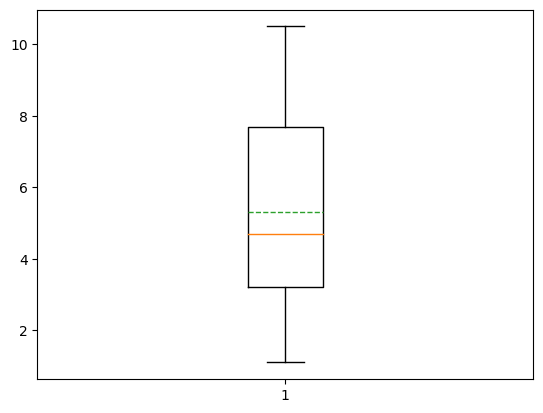

In [ ]:
plt.boxplot(data['YearsExperience'],meanline=True,showmeans=True)
plt.show()

# There is no outlier in the data. But the right skewness is present in Years-Experience data because mean value is greater than median value.

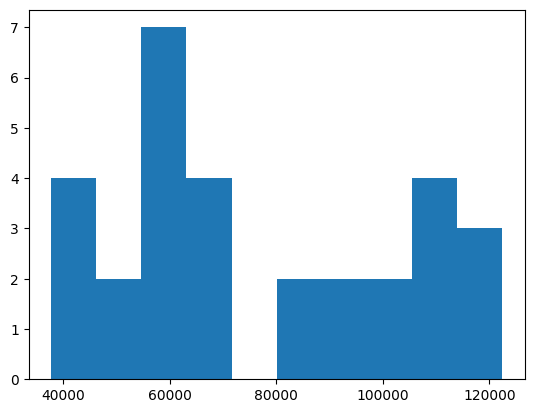

In [ ]:
plt.hist(data['Salary'])
plt.show()

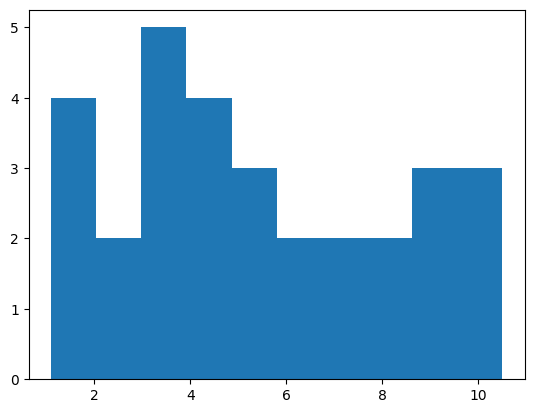

In [ ]:
plt.hist(data['YearsExperience'])
plt.show()

# Corelation Analysis

<Axes: >

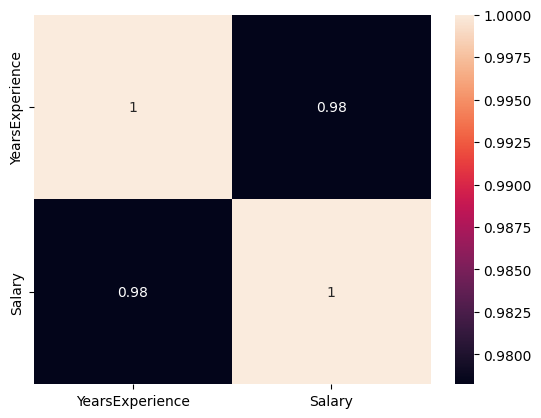

In [ ]:
sns.heatmap(data.corr(),annot=True)

# Co-relation percentage between salary and years-experience time is 98%. So, there is high co-relation between them.

# Model Building

In [ ]:
model=smf.ols("Salary~YearsExperience",data=data).fit()

<Axes: xlabel='YearsExperience', ylabel='Salary'>

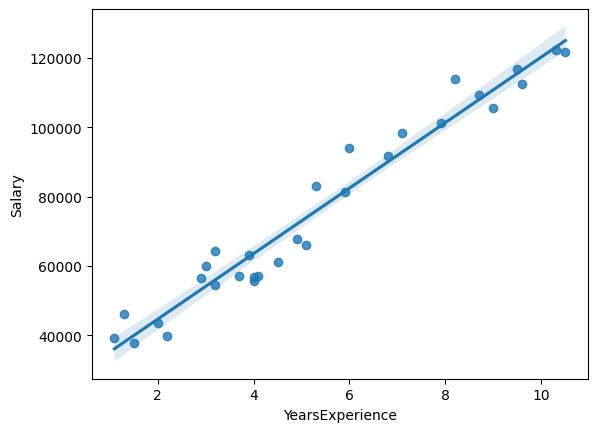

In [ ]:
sns.regplot(x=data['YearsExperience'],y=data['Salary'])

# Model Testing

In [ ]:
# Finding Coefficient parameters
model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [ ]:
# Finding tvalues and pvalues
print(model.tvalues)
print(model.pvalues)

Intercept          11.346940
YearsExperience    24.950094
dtype: float64
Intercept          5.511950e-12
YearsExperience    1.143068e-20
dtype: float64


In [ ]:
# Finding Rsquared Values
print(model.rsquared)
print(model.rsquared_adj)

0.9569566641435086
0.9554194021486339


# Exponential Transformation

In [ ]:
model_1=smf.ols("np.log(Salary)~YearsExperience",data=data).fit()

<Axes: xlabel='YearsExperience', ylabel='Salary'>

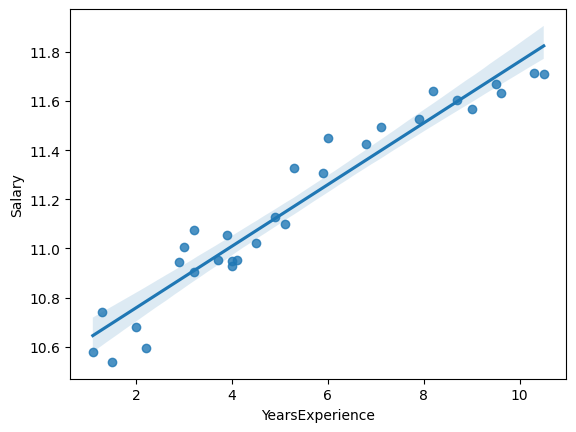

In [ ]:
sns.regplot(x=data['YearsExperience'],y=np.log(data['Salary']))

In [ ]:
# Finding Coefficient parameters
model_1.params

Intercept          10.507402
YearsExperience     0.125453
dtype: float64

In [ ]:
# Finding tvalues and pvalues
print(model_1.tvalues)
print(model_1.pvalues)

Intercept          273.327166
YearsExperience     19.584833
dtype: float64
Intercept          1.604634e-49
YearsExperience    7.027439e-18
dtype: float64


In [ ]:
# Finding Rsquared Values
print(model_1.rsquared)
print(model_1.rsquared_adj)

0.9319671194084196
0.929537373673006


# Tranforming independent variable (Logarithm Transformation)

In [ ]:
model_2=smf.ols("Salary~np.log(YearsExperience)",data=data).fit()

<Axes: xlabel='YearsExperience', ylabel='Salary'>

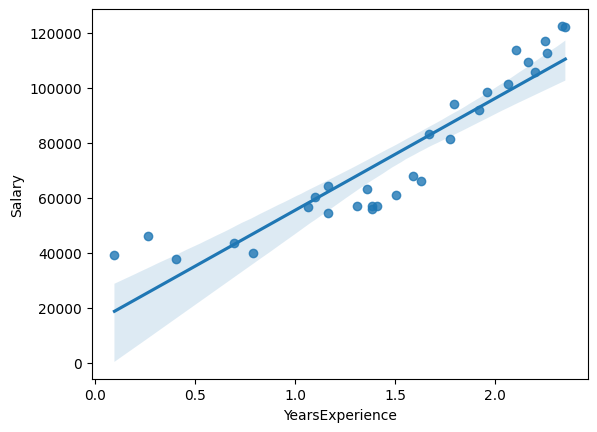

In [ ]:
sns.regplot(x=np.log(data['YearsExperience']),y=data['Salary'])

In [ ]:
# Finding Coefficient parameters
model_2.params

Intercept                  14927.97177
np.log(YearsExperience)    40581.98796
dtype: float64

In [ ]:
# Finding tvalues and pvalues
print(model_2.tvalues)
print(model_2.pvalues)

Intercept                   2.895135
np.log(YearsExperience)    12.791989
dtype: float64
Intercept                  7.268813e-03
np.log(YearsExperience)    3.250155e-13
dtype: float64


In [ ]:
# Finding Rsquared Values
print(model_2.rsquared)
print(model_2.rsquared_adj)

0.8538888828756969
0.8486706286926861


# Transform both independent and dependent variables (Log-Log Transformation)

In [ ]:
model_3=smf.ols("np.log(Salary)~np.log(YearsExperience)",data=data).fit()

<Axes: xlabel='YearsExperience', ylabel='Salary'>

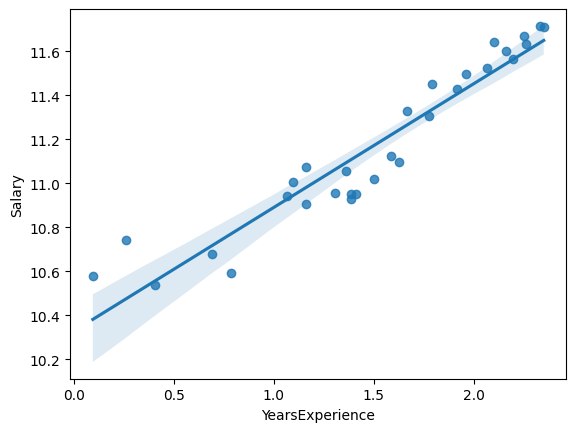

In [ ]:
sns.regplot(x=np.log(data['YearsExperience']),y=np.log(data['Salary']))

In [ ]:
# Finding Coefficient parameters
model_3.params

Intercept                  10.328043
np.log(YearsExperience)     0.562089
dtype: float64

In [ ]:
# Finding tvalues and pvalues
print(model_3.tvalues)
print(model_3.pvalues)

Intercept                  184.867959
np.log(YearsExperience)     16.352542
dtype: float64
Intercept                  9.073132e-45
np.log(YearsExperience)    7.395278e-16
dtype: float64


In [ ]:
# Finding Rsquared Values
print(model_3.rsquared)
print(model_3.rsquared_adj)

0.905215072581715
0.9018298966024905


# Checking accuracy

In [ ]:
Table=pd.DataFrame({'Prep_Models':['model(SLR)','model_1(Exp)','model_2(Logarithm)','model_3(Log-Log)'],'Rsquared':[model.rsquared,model_1.rsquared,model_2.rsquared,model_3.rsquared],'Rsquared_Adj':[model.rsquared_adj,model_1.rsquared_adj,model_2.rsquared_adj,model_3.rsquared_adj]})
Table

,Prep_Models,Rsquared,Rsquared_Adj
0,model(SLR),0.956957,0.955419
1,model_1(Exp),0.931967,0.929537
2,model_2(Logarithm),0.853889,0.848671
3,model_3(Log-Log),0.905215,0.901830


# So, we will consider the model having highest R-squared value which is model(SLR).

# Model Prediction

In [ ]:
# Manual prediction for 8 years experience
Salary = (25792.200199) + (9449.962321)*8
Salary

101391.898767

In [ ]:
# Automatic Prediction for 8 years experience
new_data=pd.DataFrame({'YearsExperience':8},index=[0])
new_data

,YearsExperience
0,8


In [ ]:
model.predict(new_data)

0    101391.89877
dtype: float64

# Getting residual

In [ ]:
residuals = model.resid
residuals

0      3155.841248
1      8127.848783
2     -2236.143681
3     -1167.124842
4     -6691.117306
5      3444.909069
6      6007.912837
7     -1587.079627
8      8412.920373
9     -3568.060788
10      570.946748
11    -7798.049484
12    -6635.049484
13    -7456.045717
14    -7206.030645
15    -4159.015574
16    -7958.008038
17     7210.999498
18     -183.977895
19    11448.025873
20     1686.056015
21     5386.067319
22      855.097462
23    10530.108765
24     1424.127605
25    -5259.861092
26     1402.157748
27    -3876.838485
28     -735.812110
29    -3144.804574
dtype: float64

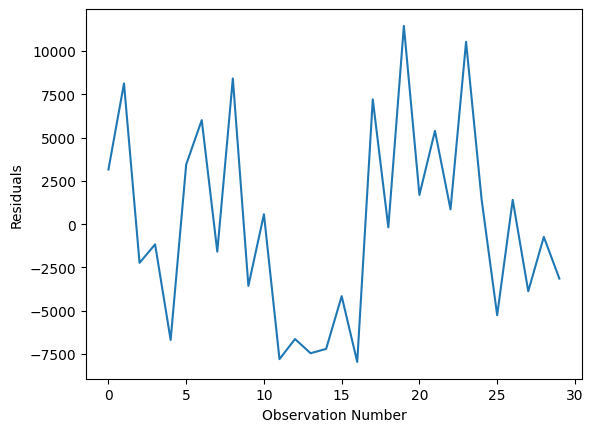

In [ ]:
plt.plot(residuals)
plt.xlabel('Observation Number')
plt.ylabel('Residuals')
plt.show()